In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('D:/Annaconda/data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
x = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
classifier = svm.SVC(probability=True)
classifier.fit(x_train, y_train)

SVC(probability=True)

In [ ]:
#menghitung AUC untuk random model
random_auc = roc_auc_score(y_test, random_probs)

#menghitung AUC SVM classifier
svm_auc = roc_auc_score(y_test, svm_probs)
 
#menampilkan hasil
print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('SVM : AUCROC = %.3f' % (svm_auc))

Random Prediction : AUCROC = 0.500
SVM : AUCROC = 0.702


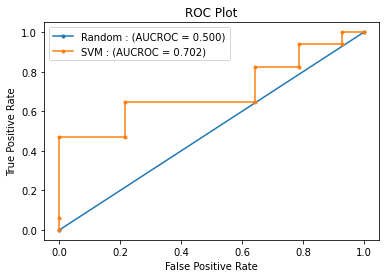

In [ ]:
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM : (AUCROC = %.3f)' % svm_auc)
 
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()